In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
import collections
import lmfit as lm
mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 8})

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'mathtext.default':  'regular' })
%matplotlib notebook
%matplotlib notebook

In [2]:
loadnames = ['2_TiSapp_TwoColor_07deg_Si29_880_895_va24_LF_CTL946p73_4s_500ms_OD04_11mWat880.mat','6_TiSapp_TwoColor_07deg_880_895_va30_LF_CTL947_4s_500ms_OD04_10mWat895.mat',
            'OH_800_900_5p5K_Si29.mat','Picard_800_900_5p5K_Si28.mat']
dictnames = ['Si29OH','Si28Si30OH','Si29OHwide','Si28Picard']
IsotopeData = collections.defaultdict(dict)
for fname,sname in zip(loadnames[0:2],dictnames[0:2]):
    datain = sio.loadmat(fname)
    keyname = list(datain.keys())[5]
    keynameWL = list(datain.keys())[-7]
    rawdat1 = datain[keyname].flatten()
    rawdat2 = datain[keynameWL].flatten()
    IsotopeData[sname]['Wavelength'] = rawdat2
    IsotopeData[sname]['SpinPol'] = rawdat1
for fname,sname in zip(loadnames[2:4],dictnames[2:4]):
    datain = sio.loadmat(fname)
    keyname = list(datain.keys())[4]
    keynameWL = list(datain.keys())[-5]
    rawdat1 = datain[keyname].flatten()
    rawdat2 = datain[keynameWL].flatten()
    IsotopeData[sname]['Wavelength'] = rawdat2
    IsotopeData[sname]['SpinPol'] = rawdat1

In [3]:
datain.keys()

dict_keys(['__header__', '__version__', '__globals__', 'xvals', 'yvals', 'h', 'va', 'T'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


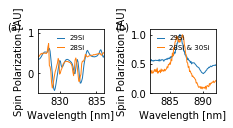

In [4]:
mm = 1/25.4

fig,ax = plt.subplots(1,2,figsize=(86*mm, 86/2*mm))
ax[0].tick_params(direction='in',length = 2)
ax[1].tick_params(direction='in',length = 2)
color = ['r','b']
[ax[1].plot(IsotopeData[keyname]['Wavelength'],IsotopeData[keyname]['SpinPol']/np.max(IsotopeData[keyname]['SpinPol']),linewidth = 1) for keyname in list(IsotopeData.keys())[0:2]]
ax[1].set_xlabel("Wavelength [nm]")
ax[1].set_ylabel("Spin Polarization [AU]")
ax[1].set_yscale('linear')
ax[1].set_yticks([0,0.5,1.0])
ax[1].set_ylim(0,1.1)
ax[1].set_xlim(882,892)
ax[1].text(-0.25, 1.1, '(a)', transform=ax[0].transAxes, va='top', ha='right')
ax[1].legend(('29Si','28Si & 30Si'),framealpha=0,handlelength = 1,fontsize = 7)

[ax[0].plot(IsotopeData[keyname]['Wavelength'],IsotopeData[keyname]['SpinPol']/np.max(IsotopeData[keyname]['SpinPol']),linewidth = 1) for keyname in list(IsotopeData.keys())[2:4]]
ax[0].set_xlabel("Wavelength [nm]")
ax[0].set_ylabel("Spin Polarization [AU]")
ax[0].set_yscale('linear')
ax[0].set_xlim(827,836)
ax[0].set_ylim(-0.5,1.1)
ax[0].text(-0.31, 1.1, '(b)', transform=ax[1].transAxes, va='top', ha='right')
ax[0].legend(('29Si','28Si'),framealpha=0,handlelength = 1,fontsize = 7)
plt.tight_layout()

fig1 = plt.gcf()
plt.show()
fig1.savefig('Fig3_Isotope.pdf', format='pdf')

In [5]:
color[0]

'r'

In [6]:
list(IsotopeData.keys())

['Si29OH', 'Si28Si30OH', 'Si29OHwide', 'Si28Picard']